In [40]:
# Importando as bibliotecas a serem utilizadas
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Lendo a base de dados
base = pd.read_csv(r'exames-tratado-2.csv')

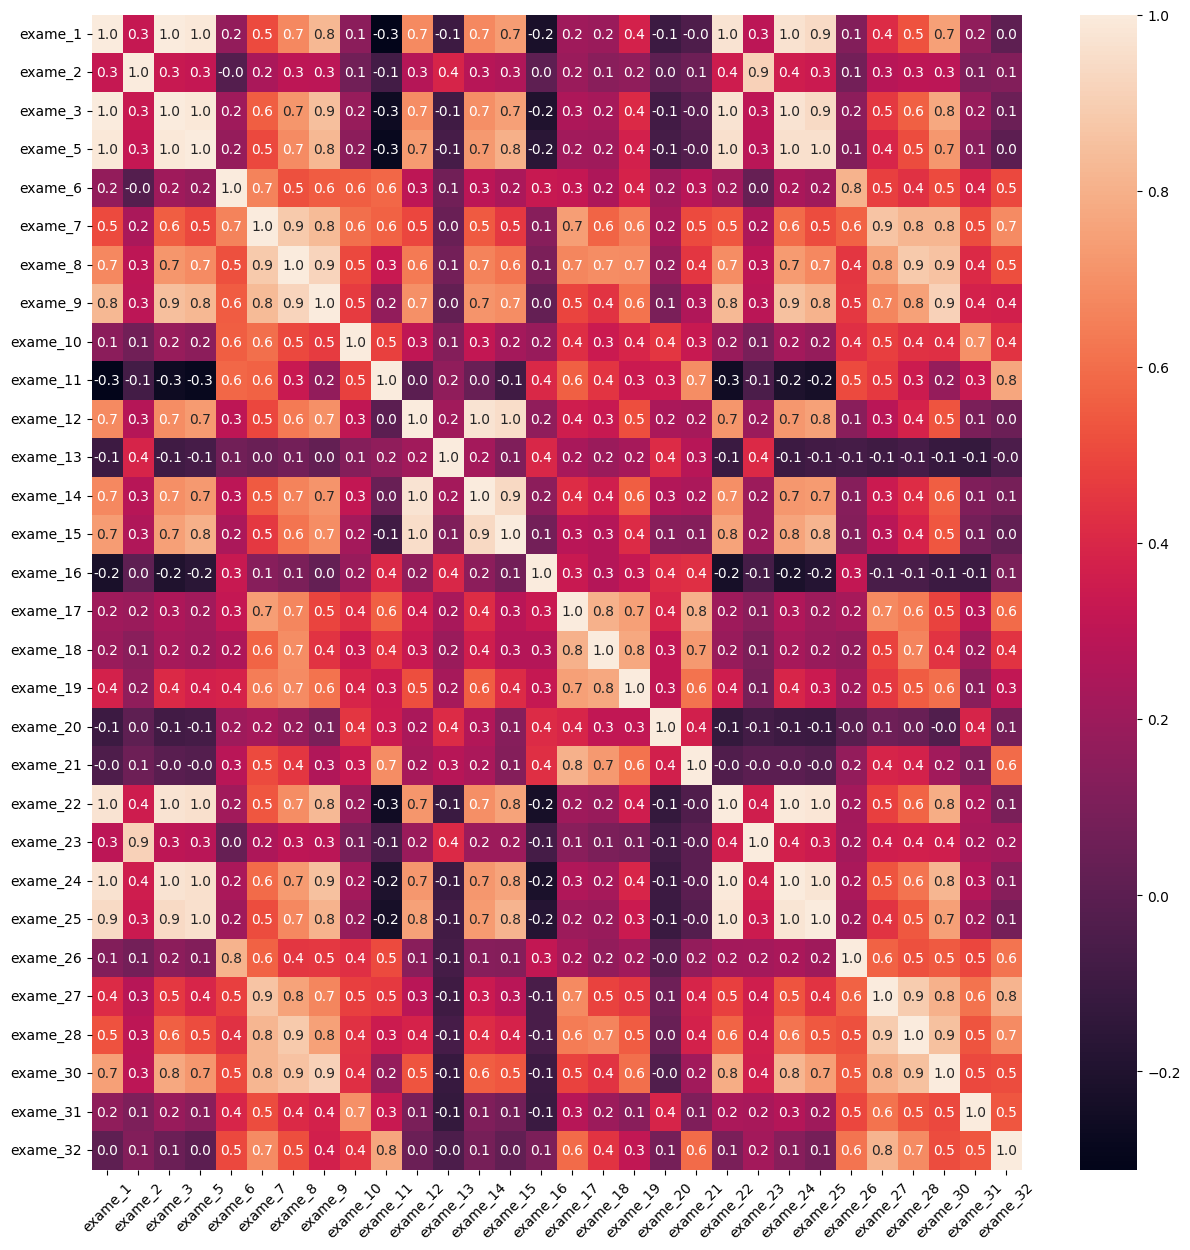

In [18]:
# Criando um heatmap para a matriz de correlação das variáveis exames
plt.figure(figsize=(15,15))

sns.heatmap(base.loc[:, 'exame_1':].corr(), annot = True, fmt='.1f')

plt.xticks(rotation = 45)

plt.show()

In [37]:
# Verificando quais variáveis possuem alta correlação entre si:

m_corr = base.loc[:, 'exame_1':].corr()

In [38]:
m_corr[m_corr>0.99][m_corr[m_corr>0.99].sum()!=1].dropna(axis=1, how='all')

,exame_1,exame_3,exame_22,exame_24
exame_1,1.000000,0.997855,NaN,NaN
exame_3,0.997855,1.000000,NaN,NaN
exame_22,NaN,NaN,1.000000,0.993708
exame_24,NaN,NaN,0.993708,1.000000


In [39]:
m_corr[m_corr>0.95][m_corr[m_corr>0.95].sum()!=1].dropna(axis=1, how='all')

,exame_1,exame_3,exame_5,exame_12,exame_14,exame_15,exame_22,exame_24,exame_25
exame_1,1.000000,0.997855,0.987357,NaN,NaN,NaN,0.969539,0.965137,NaN
exame_3,0.997855,1.000000,0.986507,NaN,NaN,NaN,0.969476,0.970387,NaN
exame_5,0.987357,0.986507,1.000000,NaN,NaN,NaN,0.962746,0.959120,0.959213
exame_12,NaN,NaN,NaN,1.000000,0.972794,0.95183,NaN,NaN,NaN
exame_14,NaN,NaN,NaN,0.972794,1.000000,NaN,NaN,NaN,NaN
exame_15,NaN,NaN,NaN,0.951830,NaN,1.00000,NaN,NaN,NaN
exame_22,0.969539,0.969476,0.962746,NaN,NaN,NaN,1.000000,0.993708,0.984015
exame_24,0.965137,0.970387,0.959120,NaN,NaN,NaN,0.993708,1.000000,0.977578
exame_25,NaN,NaN,0.959213,NaN,NaN,NaN,0.984015,0.977578,1.000000


As variáveis exame_1 e exame_3 têm alta correlação entre si (>0.99), assim como as variáveis exame_22 e exame_24 (>0.99).

Além disso, as variáveis exame_1, exame_3, exame_5, exame_22 e exame_24 todas possuem correlações com valores de R maiores que 0.95.

Portanto, serão avaliadas quais destas variáveis podem ser removidas do modelo, mantendo o score do mesmo.

In [70]:
# Definindo função para criar o modelo iterativamente e calcular o score

def teste_rfc(base, variavel, variaveis_testadas, seed):

    excluidas = [x for x in variaveis_testadas if x != variavel]

    # Definindo inputs e outputs
    x = base.drop(['id', 'diagnostico'] + excluidas, axis = 1).values
    y = base['diagnostico'].values.ravel()

    # Definindo a random seed
    SEED = seed

    # Definindo a random seed do numpy
    np.random.seed(SEED)

    # Dividindo os dados em treino e teste
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

    # Instanciando e treinando o modelo a ser treinado
    rfc = RandomForestClassifier(n_estimators=100)
    rfc.fit(x_train, y_train)

    # Calculando o score obtido com esse modelo:
    score_rfc = rfc.score(x_test, y_test)*100

    if variavel != '':
        print(f'O modelo que manteve a variável {variavel} teve um score de {score_rfc:.2f}%')
    else:
        print(f'O modelo que removeu todas as variáveis teve um score de {score_rfc:.2f}%')

In [65]:
# Criando lista com variáveis a serem testadas
variaveis_testadas = ['exame_1', 'exame_3', 'exame_5', 'exame_22', 'exame_24']

In [71]:
# Testando todas as variáveis
for variavel in variaveis_testadas:
    teste_rfc(base, variavel, variaveis_testadas, 30)

O modelo que manteve a variável exame_1 teve um score de 95.91%
O modelo que manteve a variável exame_3 teve um score de 95.91%
O modelo que manteve a variável exame_5 teve um score de 97.66%
O modelo que manteve a variável exame_22 teve um score de 96.49%
O modelo que manteve a variável exame_24 teve um score de 95.91%


In [73]:
# Testando modelo onde todas as variáveis são removidas
teste_rfc(base, '', variaveis_testadas, 30)

O modelo que removeu todas as variáveis teve um score de 97.08%


Sendo assim, será mantida apenas a variável exame_5

In [75]:
# Exportando a base de dados tratada
base.drop(['exame_1', 'exame_3', 'exame_22', 'exame_24'], axis = 1).to_csv(r'exames-tratado-3.csv')